# Importing the dependencies

In [41]:
#Import standard operational packages.
import pandas as pd
import numpy as np

#Import tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

#Import visualization packages.
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data loading and preprocessing

In [42]:
df=pd.read_csv('Customers.csv')

In [43]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [44]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [45]:
df0=df.dropna(axis=0).reset_index(drop=True)
df0

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1960,1996,Female,71,184387,40,Artist,8,7
1961,1997,Female,91,73158,32,Doctor,7,7
1962,1998,Male,87,90961,14,Healthcare,9,2
1963,1999,Male,77,182109,4,Executive,7,2


In [46]:
gender_count=df0['Gender'].value_counts()
gender_count


Female    1166
Male       799
Name: Gender, dtype: int64

In [47]:
names=gender_count.index
names

Index(['Female', 'Male'], dtype='object')

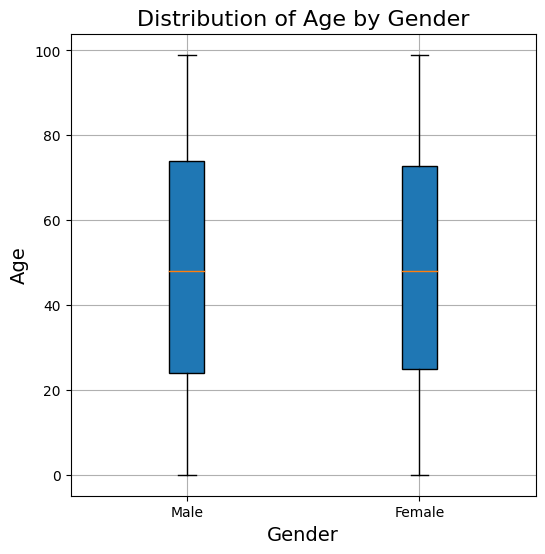

In [49]:
# Create a boxplot of Age by Gender
plt.figure(figsize=(6, 6))
plt.boxplot([df0['Age'][df0['Gender'] == 'Male'], df0['Age'][df0['Gender'] == 'Female']], labels=['Male', 'Female'], patch_artist=True)

# Set the title and labels
plt.title('Distribution of Age by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

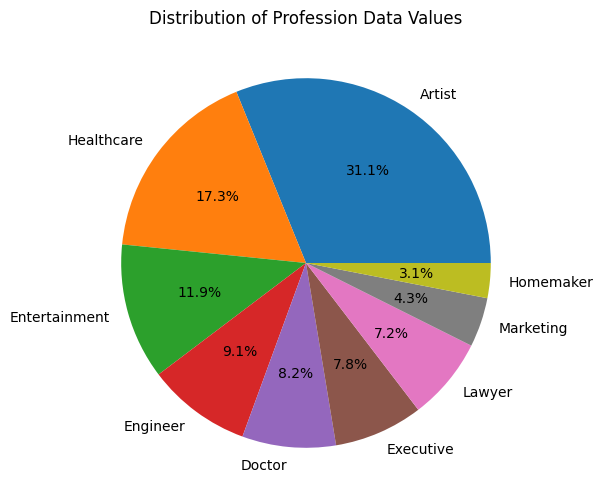

In [50]:
# Extract the count of each profession from the dataframe
profession_dis = df0.Profession.value_counts()

# Extract the names of each profession from the profession_dis index
names = profession_dis.index

# Create a pie chart to visualize the distribution of profession data values
plt.figure(figsize=(8, 6))
plt.pie(profession_dis, labels=names, autopct='%1.1f%%')

# Set the title of the plot
plt.title('Distribution of Profession Data Values')

# Show the plot
plt.show()

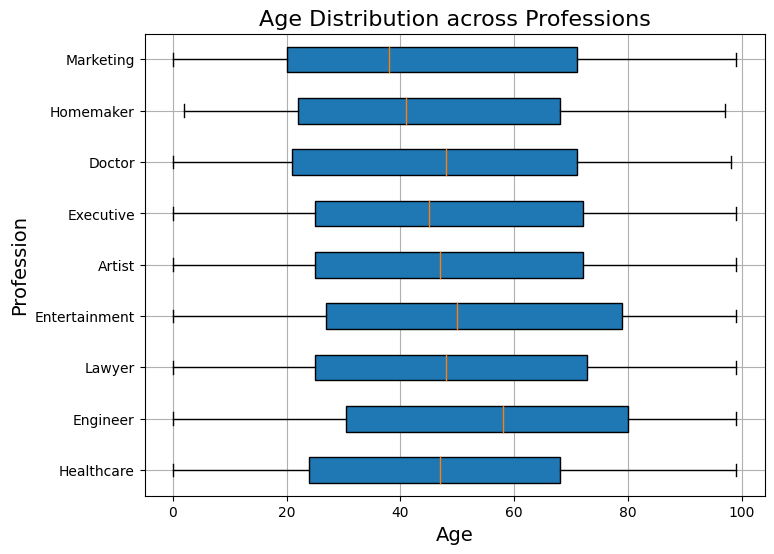

In [51]:
professions = df0['Profession'].unique()

plt.figure(figsize=(8, 6))
plt.boxplot([df0['Age'][df0['Profession'] == profession] for profession in professions], labels=professions, vert=False, patch_artist=True)

# Set the title and labels
plt.title('Age Distribution across Professions', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Profession', fontsize=14)

plt.grid(True)
plt.show()

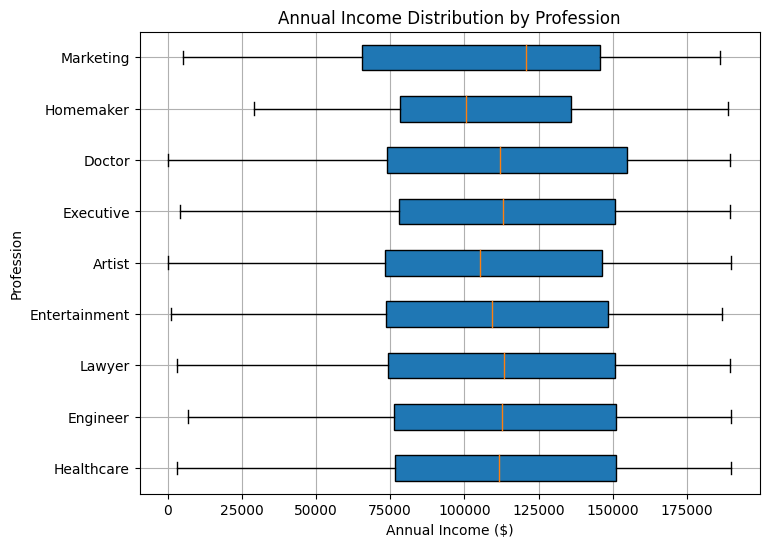

In [52]:
# Group the data by profession
grouped_df = df0.groupby('Profession')

# Create a box plot for each profession group
fig, ax = plt.subplots(figsize=(8, 6))
plt.boxplot([df0['Annual Income ($)'][df0['Profession'] == profession] for profession in professions], labels=professions, vert=False, patch_artist=True)


# Set the title and labels
plt.title('Annual Income Distribution by Profession')
plt.ylabel('Profession')
plt.xlabel('Annual Income ($)')

plt.grid(True)
plt.show()

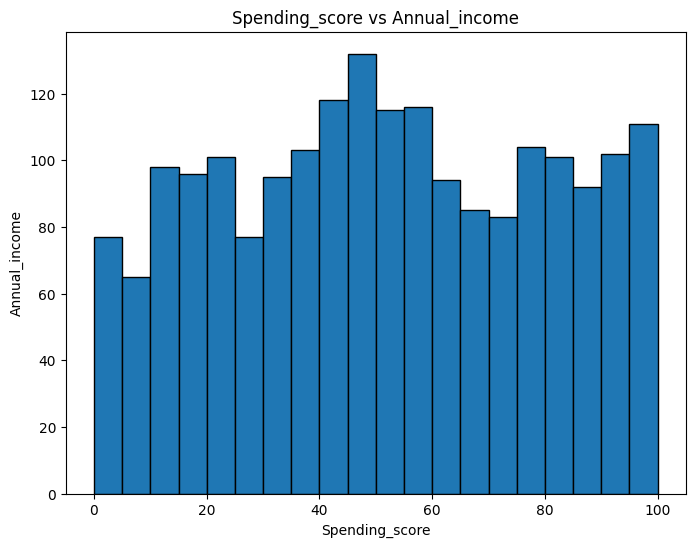

In [53]:
# Get the Spending_score and Annual_income columns
spending_score = df0['Spending Score (1-100)']
annual_income = df0['Annual Income ($)']

# Create a histogram of Spending_score vs Annual_income
plt.figure(figsize=(8, 6))
# plt.hist(spending_score, annual_income, cmap='viridi  s')
plt.hist(spending_score, bins=20, edgecolor='black')
# Set the title and labels
plt.title('Spending_score vs Annual_income')
plt.xlabel('Spending_score')
plt.ylabel('Annual_income')

# Show the plot
# plt.colorbar()
plt.show()

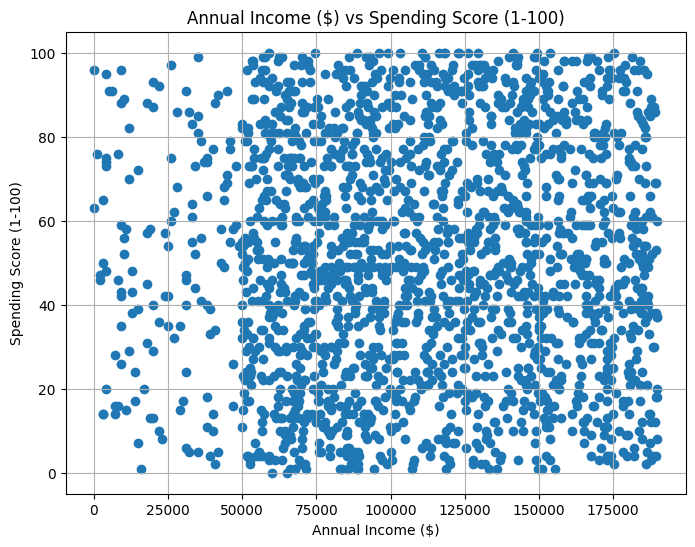

In [54]:
# Get the Annual Income ($)' and 'Spending Score (1-100)' columns
annual_income = df0['Annual Income ($)']
spending_score = df0['Spending Score (1-100)']

# Create a scatter plot of Annual Income ($) vs Spending Score (1-100)
plt.figure(figsize=(8, 6))
plt.scatter(annual_income, spending_score)

# Set the title and labels
plt.title('Annual Income ($) vs Spending Score (1-100)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.grid(True)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19192\1259800643.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



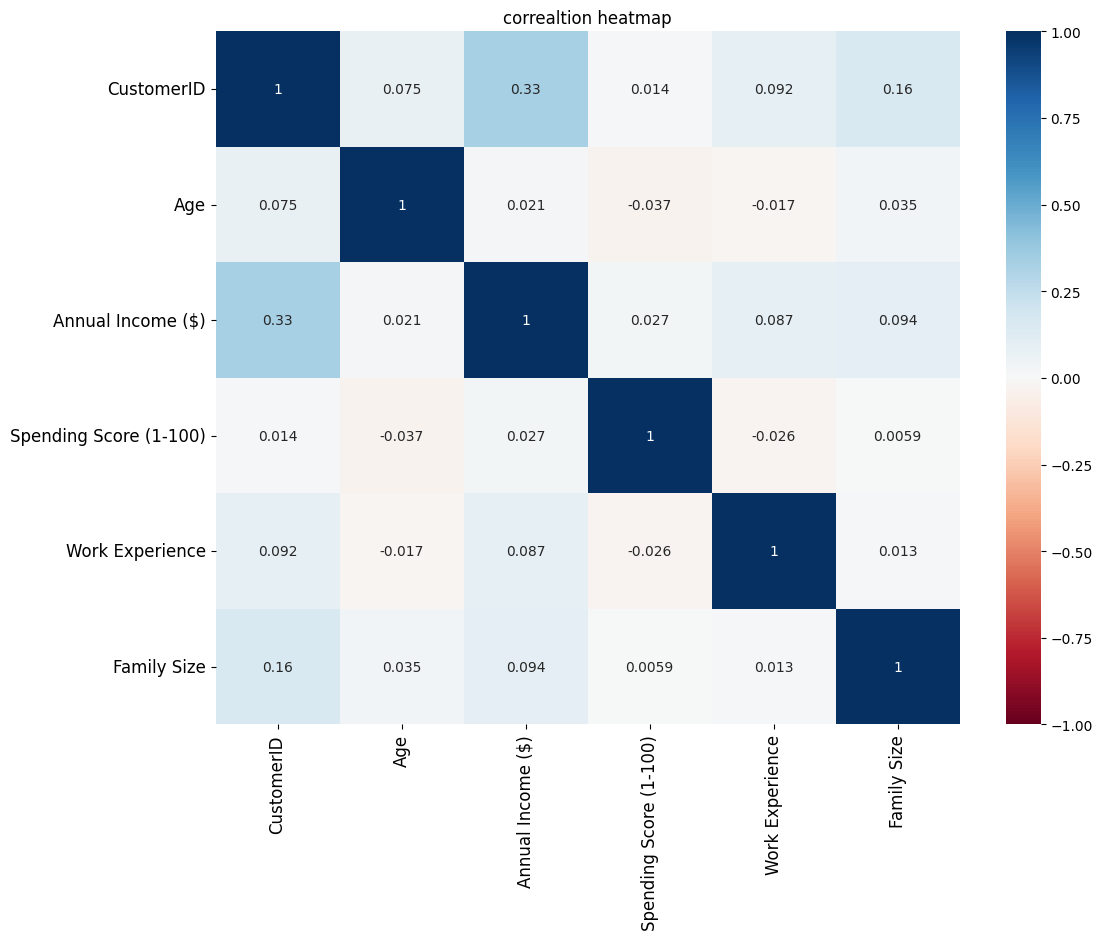

In [55]:
plt.figure(figsize = (12,9))
s=sns.heatmap(df0.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90,fontsize=12)
plt.title('correaltion heatmap')
plt.show()

In [56]:
df_subset=df0[['Annual Income ($)','Spending Score (1-100)']]
df_subset.head()

,Annual Income ($),Spending Score (1-100)
0,15000,39
1,35000,81
2,86000,6
3,59000,77
4,38000,40


In [14]:
scaler =MinMaxScaler()
scaler.fit(df_subset[['Annual Income ($)']])
df_subset['Annual Income ($)']=scaler.transform(df_subset[['Annual Income ($)']])
scaler.fit(df_subset[['Spending Score (1-100)']])
df_subset['Spending Score (1-100)']=scaler.transform(df_subset[['Spending Score (1-100)']])
df_subset

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19192\1619842309.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19192\1619842309.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income ($),Spending Score (1-100)
0,0.078958,0.39
1,0.184236,0.81
2,0.452694,0.06
3,0.310569,0.77
4,0.200027,0.40
...,...,...
1960,0.970591,0.40
1961,0.385095,0.32
1962,0.478808,0.14
1963,0.958600,0.04


In [16]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df_subset[['Spending Score (1-100)','Annual Income ($)']])
  sse.append(km.inertia_)

sse

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

[268.04767891278163,
 156.90859688229244,
 104.7606672904891,
 73.64008699174012,
 59.61509336290665,
 48.2523022951611,
 41.46593781508807,
 36.96620700089959,
 33.15652459043413]

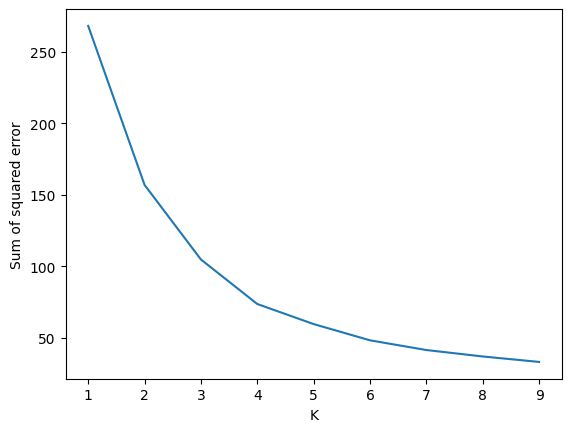

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [26]:
km=KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [27]:
y_predicted=km.fit_predict(df_subset[['Annual Income ($)','Spending Score (1-100)']])
y_predicted

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 2, 3, ..., 3, 0, 2])

In [28]:
df_subset['cluster']=y_predicted
df_subset.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19192\2256589939.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income ($),Spending Score (1-100),cluster
0,0.078958,0.39,3
1,0.184236,0.81,2
2,0.452694,0.06,3
3,0.310569,0.77,2
4,0.200027,0.40,3


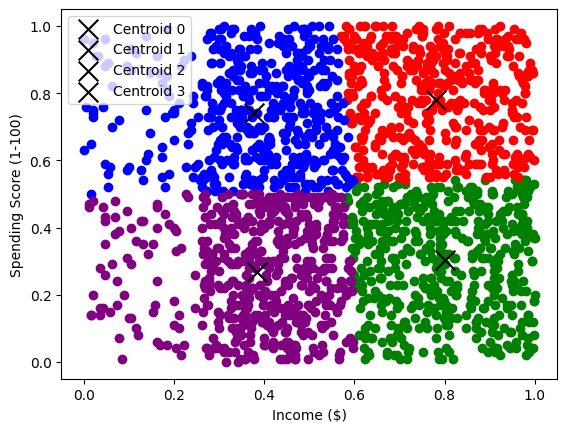

In [29]:
df1=df_subset[df_subset.cluster==0]
df2=df_subset[df_subset.cluster==1]

df3=df_subset[df_subset.cluster==2]
df4=df_subset[df_subset.cluster==3]


plt.scatter(df1['Annual Income ($)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income ($)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income ($)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income ($)'],df4['Spending Score (1-100)'],color='purple')


centroid1 = df1[['Annual Income ($)','Spending Score (1-100)']].mean()
centroid2 = df2[['Annual Income ($)','Spending Score (1-100)']].mean()
centroid3 = df3[['Annual Income ($)','Spending Score (1-100)']].mean()
centroid4 = df4[['Annual Income ($)','Spending Score (1-100)']].mean()


plt.scatter( centroid1['Annual Income ($)'],centroid1['Spending Score (1-100)'], color='black', marker='x', s=200, label='Centroid 0')
plt.scatter( centroid2['Annual Income ($)'],centroid2['Spending Score (1-100)'], color='black', marker='x', s=200, label='Centroid 1')
plt.scatter( centroid3['Annual Income ($)'],centroid3['Spending Score (1-100)'], color='black', marker='x', s=200, label='Centroid 2')
plt.scatter( centroid4['Annual Income ($)'],centroid4['Spending Score (1-100)'], color='black', marker='x', s=200, label='Centroid 3')

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Income ($)')
plt.legend()

* Conclusions drawn from the scatter plot
1. Green cluster - Very less income , high expenditure
2. purple - Less income, less expenditure
3. Blue - High income, less expenditure
4. Red - High income, high expenditure

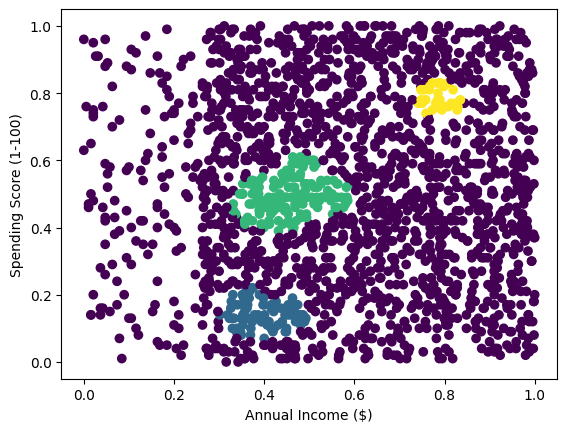

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19192\730743073.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
# Create a copy of your DataFrame with the selected columns
X = df_subset[['Annual Income ($)', 'Spending Score (1-100)']].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.2, min_samples=32)  # You can adjust eps and min_samples
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize the clusters (if you want)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=dbscan_labels)
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Add cluster labels to your DataFrame
df_subset['DBSCAN Cluster'] = dbscan_labels

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19192\1177067034.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



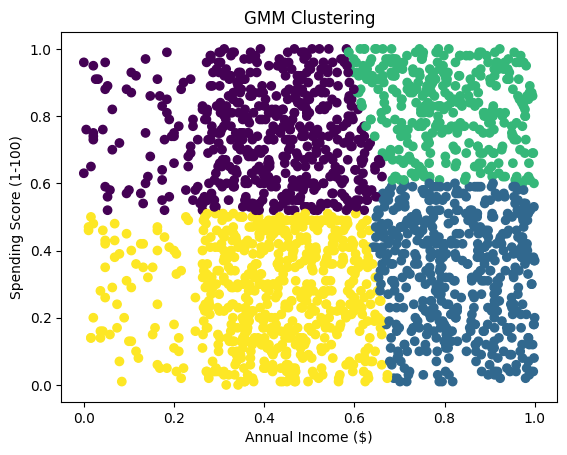

In [31]:
# Select the features for clustering
X = df_subset[['Annual Income ($)', 'Spending Score (1-100)']]

# Specify the number of clusters (components)
n_components = 4  # You can adjust this based on your domain knowledge or experimentation

# Create and fit the GMM model
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Get cluster labels for each data point
cluster_labels = gmm.predict(X)

# Add cluster labels to your DataFrame
df_subset['GMM Cluster'] = cluster_labels

# Visualize the clusters (optional)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=cluster_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering')
plt.show()

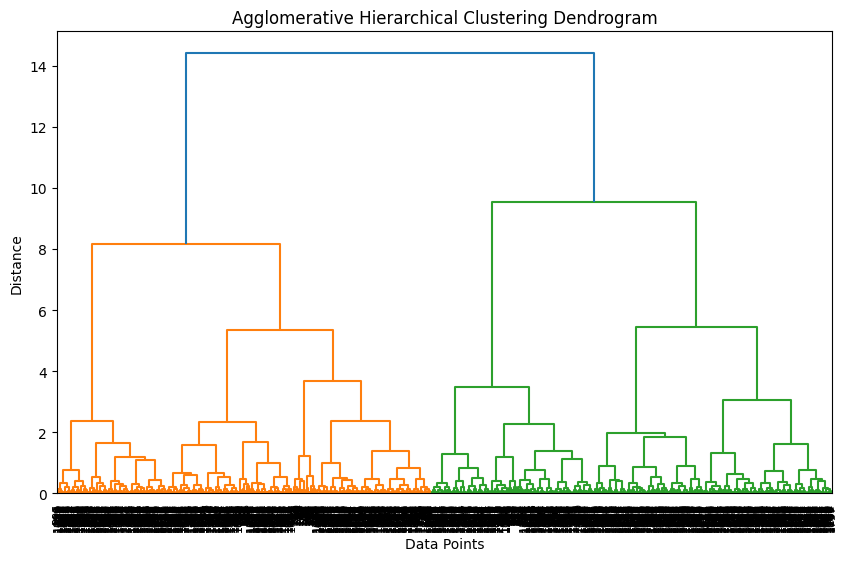

In [32]:
X = df_subset[['Annual Income ($)', 'Spending Score (1-100)']]

# Perform hierarchical clustering and generate linkage matrix
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



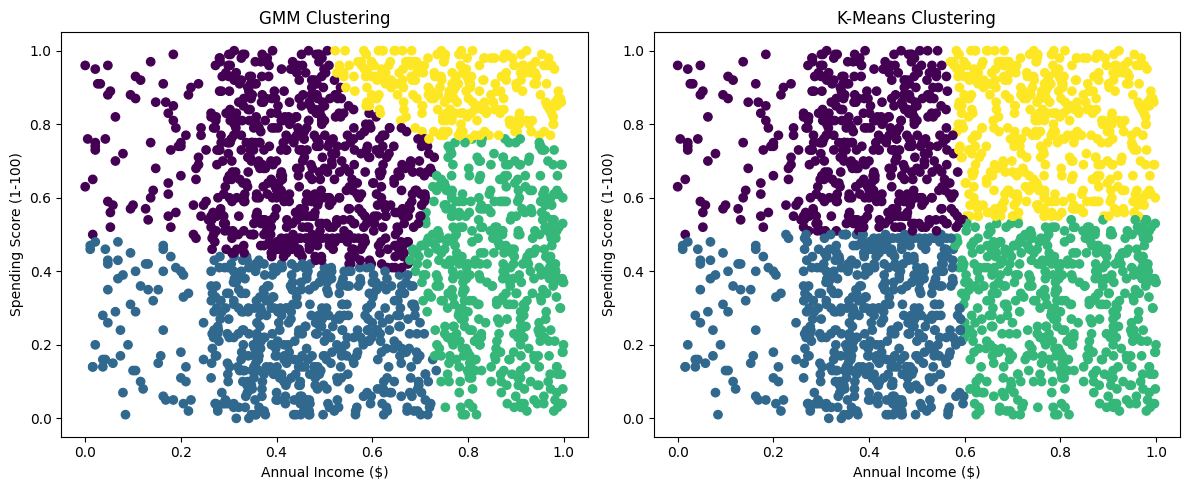

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming you have a DataFrame df_subset with your data

# Select the features for clustering
X = df_subset[['Annual Income ($)', 'Spending Score (1-100)']]

# Specify the number of clusters for K-Means
n_clusters_kmeans = 4  # Adjust as needed

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters_kmeans)
kmeans_labels = kmeans.fit_predict(X)

# Specify the number of components (clusters) for GMM
n_components_gmm = 4  # Adjust as needed

# Create and fit the GMM model
gmm = GaussianMixture(n_components=n_components_gmm)
gmm_labels = gmm.fit_predict(X)

# Create a scatter plot for GMM clustering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=gmm_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering')

# Create a scatter plot for K-Means clustering
plt.subplot(1, 2, 2)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=kmeans_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')

plt.tight_layout()
plt.show()


In [34]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X, kmeans_labels)
gmm_silhouette = silhouette_score(X, gmm_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("GMM Silhouette Score:", gmm_silhouette)

K-Means Silhouette Score: 0.3779468635004405
GMM Silhouette Score: 0.3451342780944945


In [35]:
kmeans.inertia_

73.64008699174012

In [36]:
if kmeans_silhouette > gmm_silhouette:
    print("K-Means clustering is better.")
elif gmm_silhouette > kmeans_silhouette:
    print("GMM clustering is better.")
else:
    print("Both methods have similar Silhouette Scores.")

K-Means clustering is better.


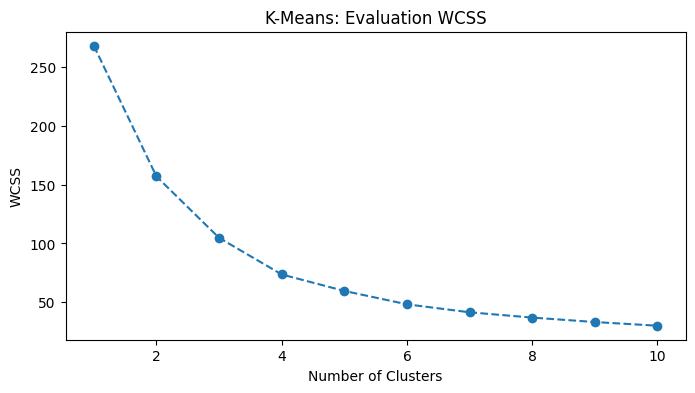

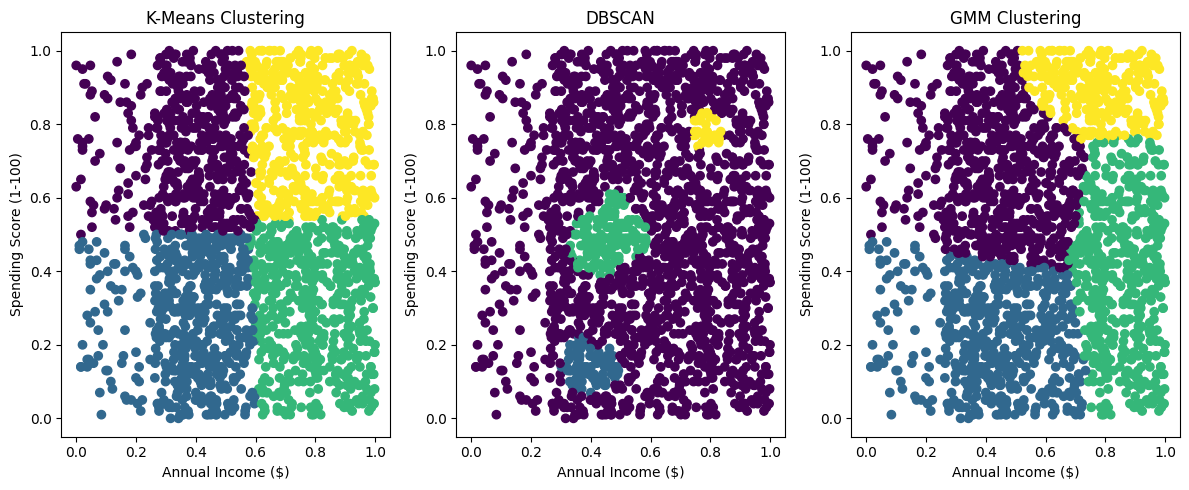

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):  # Try different numbers of clusters (e.g., 1 to 10)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for K-Means
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means: Evaluation WCSS')
plt.show()

# Create scatter plots to visualize the clusters produced by each method
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=kmeans_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=dbscan_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN')

plt.subplot(1, 3, 3)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=gmm_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering')

plt.tight_layout()
plt.show()